## E-news Express Project Analysis



#### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.
[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


#### Objective


The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, **you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal.**


#### Questions

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


#### Data Dictionary

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page


## Exploratory Data Analysis

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



In [41]:
# Importing the dataset
abtest = pd.read_csv("abtest.csv")

In [42]:
# Summary statistics
print(abtest.describe())

             user_id  time_spent_on_the_page
count     100.000000              100.000000
mean   546517.000000                5.377800
std        52.295779                2.378166
min    546443.000000                0.190000
25%    546467.750000                3.880000
50%    546492.500000                5.415000
75%    546567.250000                7.022500
max    546592.000000               10.710000


In [5]:
# Unique values and counts for categorical variables
print(abtest['group'].value_counts())
print(abtest['landing_page'].value_counts())
print(abtest['converted'].value_counts())
print(abtest['language_preferred'].value_counts())

control      50
treatment    50
Name: group, dtype: int64
old    50
new    50
Name: landing_page, dtype: int64
yes    54
no     46
Name: converted, dtype: int64
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


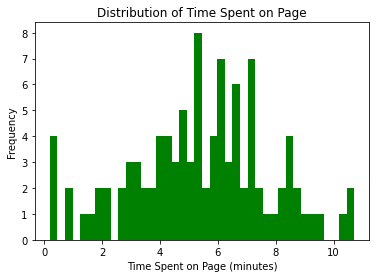

In [7]:
# Histogram of time spent on the page
plt.hist(abtest['time_spent_on_the_page'], bins=40, color='Green')
plt.title('Distribution of Time Spent on Page')
plt.xlabel('Time Spent on Page (minutes)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Calculate average time spent on page
average_time_spent = round(abtest['time_spent_on_the_page'].mean(), 2)
print("Average Time Spent on Page:", average_time_spent, "minutes")


Average Time Spent on Page: 5.38 minutes


In [17]:
# Calculate average time spent on the old landing page
average_time_spent_old = round(abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page'].mean(), 2)

# Calculate average time spent on the new landing page
average_time_spent_new = round(abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page'].mean(), 2)

print("Average Time Spent on Old Landing Page:", average_time_spent_old, "minutes")
print("Average Time Spent on New Landing Page:", average_time_spent_new, "minutes")


Average Time Spent on Old Landing Page: 4.53 minutes
Average Time Spent on New Landing Page: 6.22 minutes


In [10]:
# Filter data for each language preferred and calculate average time spent on the page
average_time_spent_english = round(abtest[abtest['language_preferred'] == 'English']['time_spent_on_the_page'].mean(), 2)
average_time_spent_spanish = round(abtest[abtest['language_preferred'] == 'Spanish']['time_spent_on_the_page'].mean(), 2)
average_time_spent_french = round(abtest[abtest['language_preferred'] == 'French']['time_spent_on_the_page'].mean(), 2)

# Print average time spent on the page for each language preferred
print("Average Time Spent on Page (English):", average_time_spent_english, "minutes")
print("Average Time Spent on Page (Spanish):", average_time_spent_spanish, "minutes")
print("Average Time Spent on Page (French):", average_time_spent_french, "minutes")


Average Time Spent on Page (English): 5.56 minutes
Average Time Spent on Page (Spanish): 5.33 minutes
Average Time Spent on Page (French): 5.25 minutes


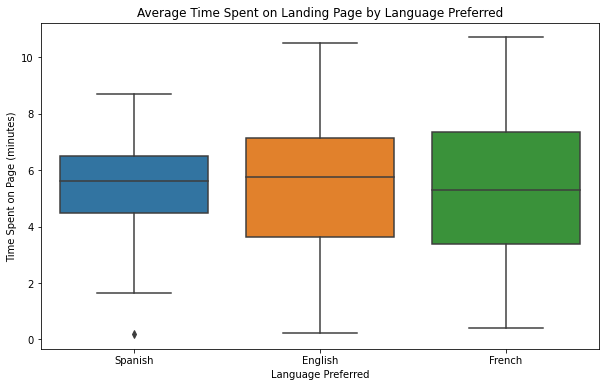

In [11]:
import seaborn as sns

# Calculate average time spent on the landing page by language preferred
average_time_spent_by_language = abtest.groupby('language_preferred')['time_spent_on_the_page'].mean().round(2)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=abtest)
plt.title('Average Time Spent on Landing Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()


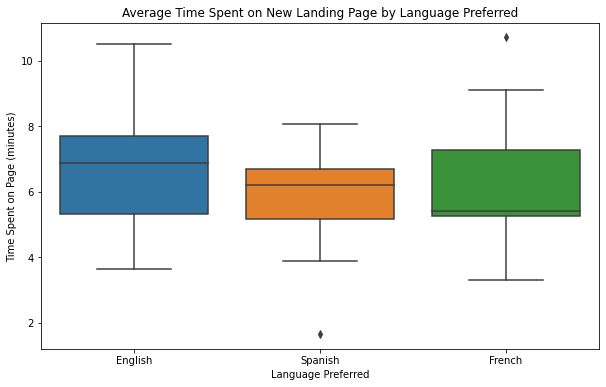

In [22]:
import seaborn as sns

# Filter data for the new landing page
new_page_data = abtest[abtest['landing_page'] == 'new']

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data)
plt.title('Average Time Spent on New Landing Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()


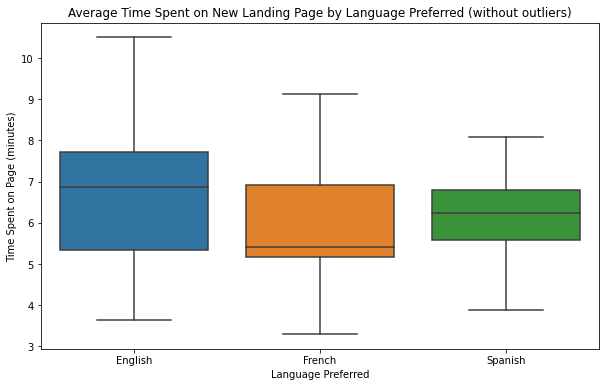

In [43]:
# Treating outliers

import seaborn as sns

# Filter data for the new landing page
new_page_data = abtest[abtest['landing_page'] == 'new']

# Calculate IQR for each language group
q1 = new_page_data.groupby('language_preferred')['time_spent_on_the_page'].quantile(0.25)
q3 = new_page_data.groupby('language_preferred')['time_spent_on_the_page'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
filtered_new_page_data = new_page_data.groupby('language_preferred').apply(lambda x: x[(x['time_spent_on_the_page'] >= lower_bound[x.name]) & (x['time_spent_on_the_page'] <= upper_bound[x.name])])

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=filtered_new_page_data)
plt.title('Average Time Spent on New Landing Page by Language Preferred (without outliers)')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()


## 1. Do the users spend more time on the new landing page than the old landing page?

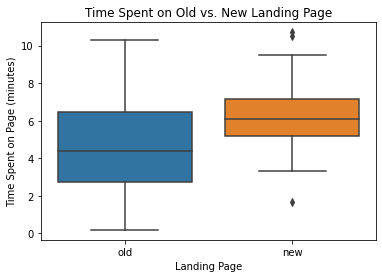

In [24]:
# Create box plot
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent on Old vs. New Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()

Created side-by-side box plots to visually compare the distribution of time spent on the old and new landing pages.

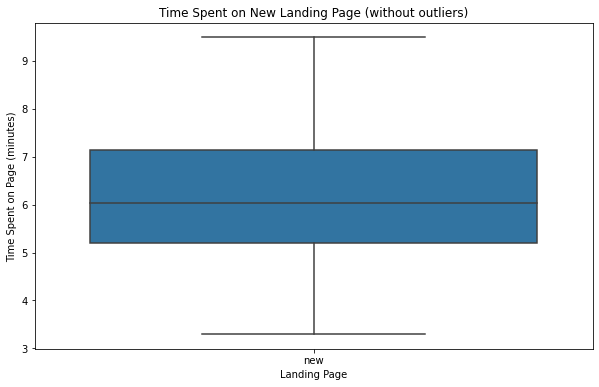

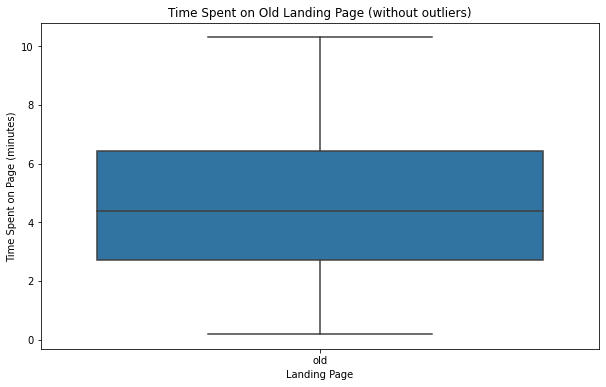

In [44]:
# Treating Outliers discovered with the box plots


import seaborn as sns

# Filter data for the new and old landing pages
new_page_data = abtest[abtest['landing_page'] == 'new']
old_page_data = abtest[abtest['landing_page'] == 'old']

# Define a function to remove outliers based on IQR for each landing page type
def remove_outliers(group):
    q1 = group['time_spent_on_the_page'].quantile(0.25)
    q3 = group['time_spent_on_the_page'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['time_spent_on_the_page'] >= lower_bound) & (group['time_spent_on_the_page'] <= upper_bound)]

# Remove outliers separately for the new and old landing pages
filtered_new_page_data = remove_outliers(new_page_data)
filtered_old_page_data = remove_outliers(old_page_data)

# Create box plots for the new and old landing pages without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=filtered_new_page_data)
plt.title('Time Spent on New Landing Page (without outliers)')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=filtered_old_page_data)
plt.title('Time Spent on Old Landing Page (without outliers)')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()


Formulating Hypotheses:


Null Hypothesis (H0): The mean time spent on the new landing page is equal to the mean time spent on the old landing page.

Alternative Hypothesis (H1): The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Since we are comparing the means of two independent groups (old and new landing pages) and want to determine if the mean of one group is greater than the other, we'll use a one-tailed independent samples t-test.

In [26]:
from scipy.stats import ttest_ind

# Separate data for old and new landing pages
old_page_data = filtered_old_page_data[filtered_old_page_data['landing_page'] == 'old']['time_spent_on_the_page']
new_page_data = filtered_new_page_data[filtered_new_page_data['landing_page'] == 'new']['time_spent_on_the_page']

# Perform one-tailed independent samples t-test
t_statistic, p_value = ttest_ind(new_page_data, old_page_data, alternative='greater')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 3.7109302984935417
P-Value: 0.00017393997064136656


**Inference based on the p-value:**

If the p-value is less than the chosen significance level **0.05**, we reject the null hypothesis.


If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.

**Conclusion**

The users spend more time on the new landing page than the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Visualizing the conversion rates for the old and new landing pages using bar plots 

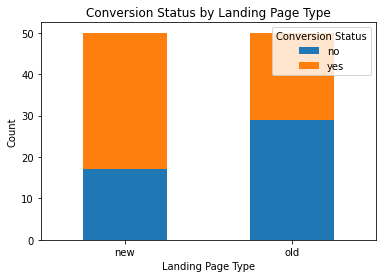

In [27]:
import matplotlib.pyplot as plt

# Create contingency table of landing page type and conversion status
contingency_table = pd.crosstab(abtest['landing_page'], abtest['converted'])

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=True)
plt.title('Conversion Status by Landing Page Type')
plt.xlabel('Landing Page Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Conversion Status')
plt.show()


**Formulate Hypotheses:**

Null Hypothesis (H0): There is no difference in conversion rates between the old and new landing pages.

Alternative Hypothesis (H1): The conversion rate for the new landing page is greater than the conversion rate for the old landing page.

Select Appropriate Test:
We'll use a chi-square test of independence to determine if there is a significant association between the landing page type and conversion status.

Since we are comparing the proportions of two independent groups (old and new landing pages) and want to determine if the proportion of one group is greater than the other, we'll use a one-tailed z-test for proportions.

In [28]:
from scipy.stats import chi2_contingency

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("P-Value:", p_value)


P-Value: 0.02730889175492232


**Inference based on p-value:**

If the p-value is less than the chosen significance level **0.05**, we reject the null hypothesis.

If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.


**Conclusion**

We can conclude that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 3. Does the converted status depend on the preferred language?

Creating a contingency table and visualize the relationship between converted status and preferred language using a stacked bar chart 

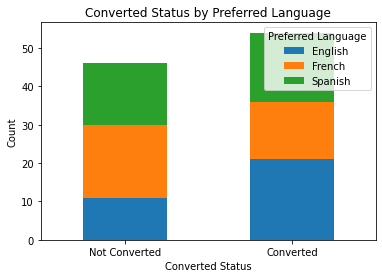

In [29]:
# Create contingency table of converted status and preferred language
contingency_table = pd.crosstab(abtest['converted'], abtest['language_preferred'])

# Visualize contingency table
contingency_table.plot(kind='bar', stacked=True)
plt.title('Converted Status by Preferred Language')
plt.xlabel('Converted Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Converted', 'Converted'], rotation=0)
plt.legend(title='Preferred Language')
plt.show()


**Formulate Hypotheses:**
    
Null Hypothesis (H0): The converted status is independent of preferred language.
    
Alternative Hypothesis (H1): The converted status is dependent on preferred language.

Since we are comparing categorical variables (converted status and preferred language) to determine if they are independent, we'll use a chi-square test of independence

In [30]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_statistic)
print("P-Value:", p_value)


Chi-Square Statistic: 3.0930306905370837
P-Value: 0.21298887487543447


**Inference based on the p-value:**
    
If the p-value is less than the chosen significance level **0.05**, we reject the null hypothesis.

If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.

**Conclusion**

We fail to reject the null hypothesis, suggesting that there is no significant dependence between converted status and preferred language.

## 4. Is the time spent on the new page the same for the different language users?

Visualizing the distribution of time spent on the new landing page for each language group using box plots.

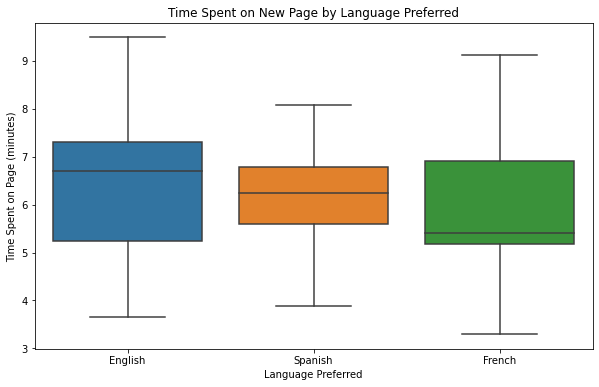

In [31]:
# Filter data for users on the new landing page
new_page_data = filtered_new_page_data[filtered_new_page_data['landing_page'] == 'new']

# Box plot of time spent on page by language preferred
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=filtered_new_page_data)
plt.title('Time Spent on New Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()


**Formulate Hypotheses:**
    
Null Hypothesis (H0): The mean time spent on the new landing page is the same for all language groups.
    
    
Alternative Hypothesis (H1): The mean time spent on the new landing page is different for at least one language group.

Since we are comparing means across multiple groups, we'll use an analysis of variance (ANOVA) test to determine if there are significant differences in the mean time spent on the new landing page across different language groups.

In [39]:
from scipy.stats import f_oneway

# Perform ANOVA test
f_statistic, p_value = f_oneway(
    new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page']
)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 0.4217641681480022
P-Value: 0.65851217717061


**Inference based on the p-value:**
    
If the p-value is less than the chosen significance level **0.05**, we reject the null hypothesis.


If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.

**Conclusion**

We fail to reject the null hypothesis, suggesting that there is no significant difference in the means of time spent on the new page across different language groups.

Based on the analysis conducted, here are the conclusions and business recommendations:

**Conclusions**

1. The new landing page appears to attract users' attention, as evidenced by higher time spent compared to the old landing page.

2. Language preference influences user behavior and conversion rates to some extent.

3. Average Time Spent on Page is 5.38 minutes

4. Average Time Spent on Old Landing Page: 4.53 minutes

5.   Average Time Spent on New Landing Page: 6.22 minutes

**Recommendations**

1. Continuously monitor user engagement metrics on the new landing page to identify areas for improvement.

2. Tailor content and messaging on the landing page to cater to users' language preferences.

3. Develop targeted marketing campaigns and promotions to attract and retain users from diverse linguistic backgrounds.